In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import yfinance as yfin
import matplotlib.dates as mdates

In [3]:
start='2006-01-01'
end='2023-01-03'
timeSeriesData = pd.DataFrame()
tickerListYahoo = ['^GSPC']
tickerListFred = ['DFF','PCETRIM12M159SFRBDAL','DGS30']


for ticker in tickerListFred:
    timeSeriesData[ticker] = wb.DataReader([ticker], data_source ='fred',start=start, end=end) 

yfin.pdr_override()

for ticker in tickerListYahoo:
    timeSeriesData[ticker] = wb.get_data_yahoo(ticker,start=start, end=end)['Close']


[*********************100%***********************]  1 of 1 completed


In [4]:
timeSeriesData[0:5]
timeSeriesData[-5:]

,DFF,PCETRIM12M159SFRBDAL,DGS30,^GSPC
DATE,,,,
2006-01-01,4.09,2.39,NaN,NaN
2006-01-02,4.09,NaN,NaN,NaN
2006-01-03,4.34,NaN,4.52,1268.800049
2006-01-04,4.22,NaN,4.55,1273.459961
2006-01-05,4.24,NaN,4.51,1273.479980


,DFF,PCETRIM12M159SFRBDAL,DGS30,^GSPC
DATE,,,,
2022-12-25,4.33,NaN,NaN,NaN
2022-12-26,4.33,NaN,NaN,NaN
2022-12-27,4.33,NaN,3.93,3829.250000
2022-12-28,4.33,NaN,3.98,3783.219971
2022-12-29,4.33,NaN,3.92,3849.280029


In [5]:
timeSeriesData['PCETRIM12M159SFRBDAL'] = timeSeriesData['PCETRIM12M159SFRBDAL'].fillna(method="ffill")

In [6]:
timeSeriesData

,DFF,PCETRIM12M159SFRBDAL,DGS30,^GSPC
DATE,,,,
2006-01-01,4.09,2.39,NaN,NaN
2006-01-02,4.09,2.39,NaN,NaN
2006-01-03,4.34,2.39,4.52,1268.800049
2006-01-04,4.22,2.39,4.55,1273.459961
2006-01-05,4.24,2.39,4.51,1273.479980
...,...,...,...,...
2022-12-25,4.33,4.63,NaN,NaN
2022-12-26,4.33,4.63,NaN,NaN
2022-12-27,4.33,4.63,3.93,3829.250000


Text(0.5, 1.0, 'SP500 & Rates')

Text(0.5, 0, 'Date')

Text(0, 0.5, '^GSPC')

Text(0, 0.5, 'DFF')

Text(0, 0.5, 'PCETRIM12M159SFRBDAL')

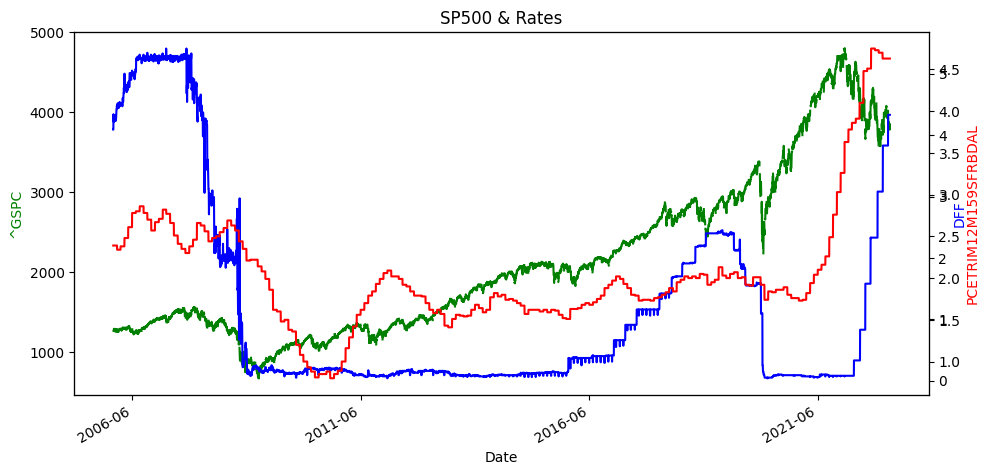

In [7]:
# show graph of current values for: PCE/core PCE, interest rates, stock market, etc
# show long term government bond interest rates (have rates risen with higher inflation?),overlay them
y1Var = "^GSPC"
y2Var = "DFF"
y3Var = "PCETRIM12M159SFRBDAL"

y1 = timeSeriesData[y1Var]
y2 = timeSeriesData[y2Var]
y3 = timeSeriesData[y3Var]
 
fig, ax = plt.subplots(figsize = (10, 5))
plt.title('SP500 & Rates')
 
ax2 = ax.twinx()
ax3 = ax.twinx()
ax.plot(timeSeriesData.index, y1, color = 'g')
ax2.plot(timeSeriesData.index, y2, color = 'b')
ax3.plot(timeSeriesData.index, y3, color = 'r')


ax.set_xlabel('Date')
ax.set_ylabel(y1Var, color = 'g')
ax2.set_ylabel(y2Var, color = 'b')
ax3.set_ylabel(y3Var, color = 'r')

plt.tight_layout()
plt.gcf().autofmt_xdate()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=60))
plt.show()

Text(0.5, 1.0, 'SP500 & Rates')

Text(0.5, 0, 'Date')

Text(0, 0.5, 'DGS30')

Text(0, 0.5, 'DFF')

Text(0, 0.5, 'PCETRIM12M159SFRBDAL')

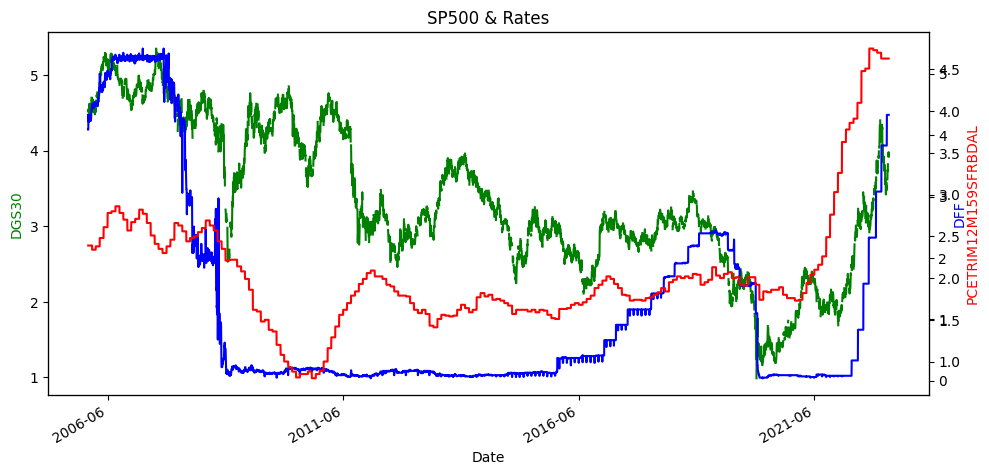

In [8]:
# show graph of current values for: PCE/core PCE, interest rates, stock market, etc
# show long term government bond interest rates (have rates risen with higher inflation?),overlay them
y1Var = "DGS30"
y2Var = "DFF"
y3Var = "PCETRIM12M159SFRBDAL"

y1 = timeSeriesData[y1Var]
y2 = timeSeriesData[y2Var]
y3 = timeSeriesData[y3Var]
 
fig, ax = plt.subplots(figsize = (10, 5))
plt.title('SP500 & Rates')
 
ax2 = ax.twinx()
ax3 = ax.twinx()
ax.plot(timeSeriesData.index, y1, color = 'g')
ax2.plot(timeSeriesData.index, y2, color = 'b')
ax3.plot(timeSeriesData.index, y3, color = 'r')


ax.set_xlabel('Date')
ax.set_ylabel(y1Var, color = 'g')
ax2.set_ylabel(y2Var, color = 'b')
ax3.set_ylabel(y3Var, color = 'r')

plt.tight_layout()
plt.gcf().autofmt_xdate()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=60))
plt.show()